In [27]:
import eeg_toolbox as et

Load data from an EDF file.

In [44]:
data, ch_names, sfreq = et.load_edf_data('PN00-1.edf')

C:\Users\hubak\PycharmProjects\scipy_proj_v2\eeg_toolbox\load.py:16: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(filepath, preload=True, verbose=False)
C:\Users\hubak\PycharmProjects\scipy_proj_v2\eeg_toolbox\load.py:16: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(filepath, preload=True, verbose=False)
C:\Users\hubak\PycharmProjects\scipy_proj_v2\eeg_toolbox\load.py:16: RuntimeWarning: Highpass cutoff frequency 15.91549 is greater than lowpass cutoff frequency 15.0, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(filepath, preload=True, verbose=False)


Processing functions

In [32]:
# Apply notch filter at 50Hz to remove powerline noise
data = et.notch_filter(data, fs = sfreq, filter_freq=50)

In [33]:
# Resample data to 100Hz
et.resample_data(data, sfreq, new_sfreq = 100)

array([[ 1.11476115e-05, -8.75288353e-06,  9.39969030e-07, ...,
         1.11445033e-05, -8.11582889e-06, -5.78545338e-06],
       [-3.48846470e-06, -3.32062200e-06, -5.08078746e-07, ...,
         2.09018459e-06,  4.99985200e-06,  1.32805302e-05],
       [ 4.29916441e-06,  5.07226692e-06,  6.95184117e-06, ...,
         1.15736861e-05,  1.07237902e-05,  8.80057010e-06],
       ...,
       [ 5.37246155e-06, -4.24400330e-05, -3.21821897e-06, ...,
         3.81827500e-05,  2.64504198e-05,  4.35784822e-05],
       [-1.66257327e-04, -1.84299143e-04, -1.63170450e-04, ...,
        -1.22684931e-04, -1.30714347e-04, -1.12046274e-04],
       [ 4.00000000e-05,  4.00000000e-05,  4.00000000e-05, ...,
         4.00000000e-05,  4.00000000e-05,  4.00000000e-05]],
      shape=(35, 262500))

In [37]:
# Bandpass filter (can be used as high or low pass filter)
et.bandpass_filter(data, freq=sfreq, highcut=150, order=5)

array([[ 1.87358525e-06, -8.51289171e-07, -2.15811652e-06, ...,
         1.58825303e-05,  1.38709711e-05,  8.87452537e-06],
       [-1.00001361e-05, -1.30275616e-05, -1.20152517e-05, ...,
         1.21555820e-05,  1.00782230e-05,  8.99699202e-06],
       [-8.75308253e-07,  8.78608722e-08,  2.28652164e-06, ...,
         1.11832756e-05,  1.04652206e-05,  7.87483074e-06],
       ...,
       [-1.58768722e-05, -1.70701794e-05, -2.44977730e-05, ...,
         4.24648007e-05,  4.57174523e-05,  4.92578275e-05],
       [-1.87874598e-04, -2.08121531e-04, -2.12305069e-04, ...,
        -1.17979747e-04, -1.16321117e-04, -1.09260095e-04],
       [ 4.00000000e-05,  4.00000000e-05,  4.00000000e-05, ...,
         4.00000000e-05,  4.00000000e-05,  4.00000000e-05]],
      shape=(35, 1344000))

In [40]:
# Apply z-score normalization per channel
et.zscore_normalization(data)

array([[-0.08603595, -0.15213783, -0.23660134, ...,  0.3362816 ,
         0.24814577,  0.11961434],
       [-0.57896591, -0.67345622, -0.67345622, ...,  0.28089599,
         0.14860954,  0.13916051],
       [-0.1379256 , -0.09058666, -0.04755125, ...,  0.30103553,
         0.22787534,  0.16332223],
       ...,
       [-0.12769314, -0.13901078, -0.17828968, ...,  0.17921486,
         0.20451313,  0.2191595 ],
       [-0.50123058, -0.55507493, -0.56049123, ..., -0.31771372,
        -0.32408583, -0.30082762],
       [-1.        , -1.        , -1.        , ..., -1.        ,
        -1.        , -1.        ]], shape=(35, 1344000))

In [42]:
# Apply min-max normalization per channel
et.minmax_normalization(data)

array([[0.47295838, 0.47146299, 0.46955221, ..., 0.48251225, 0.4805184 ,
        0.4776107 ],
       [0.47930371, 0.47727963, 0.47727963, ..., 0.4977229 , 0.49488918,
        0.49468677],
       [0.6532432 , 0.65482526, 0.65626348, ..., 0.66791313, 0.66546814,
        0.6633108 ],
       ...,
       [0.49828215, 0.49802257, 0.49712165, ..., 0.5053215 , 0.50590175,
        0.50623769],
       [0.51541429, 0.51262818, 0.51234792, ..., 0.52491015, 0.52458043,
        0.5257839 ],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan]], shape=(35, 1344000))

In [43]:
# Apply mean centering per channel
et.mean_centering(data)

array([[-2.92852334e-06, -5.17852334e-06, -8.05352334e-06, ...,
         1.14464767e-05,  8.44647666e-06,  4.07147666e-06],
       [-1.53181278e-05, -1.78181278e-05, -1.78181278e-05, ...,
         7.43187221e-06,  3.93187221e-06,  3.68187221e-06],
       [-4.00616667e-06, -2.63116667e-06, -1.38116667e-06, ...,
         8.74383333e-06,  6.61883333e-06,  4.74383333e-06],
       ...,
       [-2.39756443e-05, -2.61006443e-05, -3.34756443e-05, ...,
         3.36493557e-05,  3.83993557e-05,  4.11493557e-05],
       [-1.96650065e-04, -2.17775065e-04, -2.19900065e-04, ...,
        -1.24650065e-04, -1.27150065e-04, -1.18025065e-04],
       [-9.48676901e-20, -9.48676901e-20, -9.48676901e-20, ...,
        -9.48676901e-20, -9.48676901e-20, -9.48676901e-20]],
      shape=(35, 1344000))

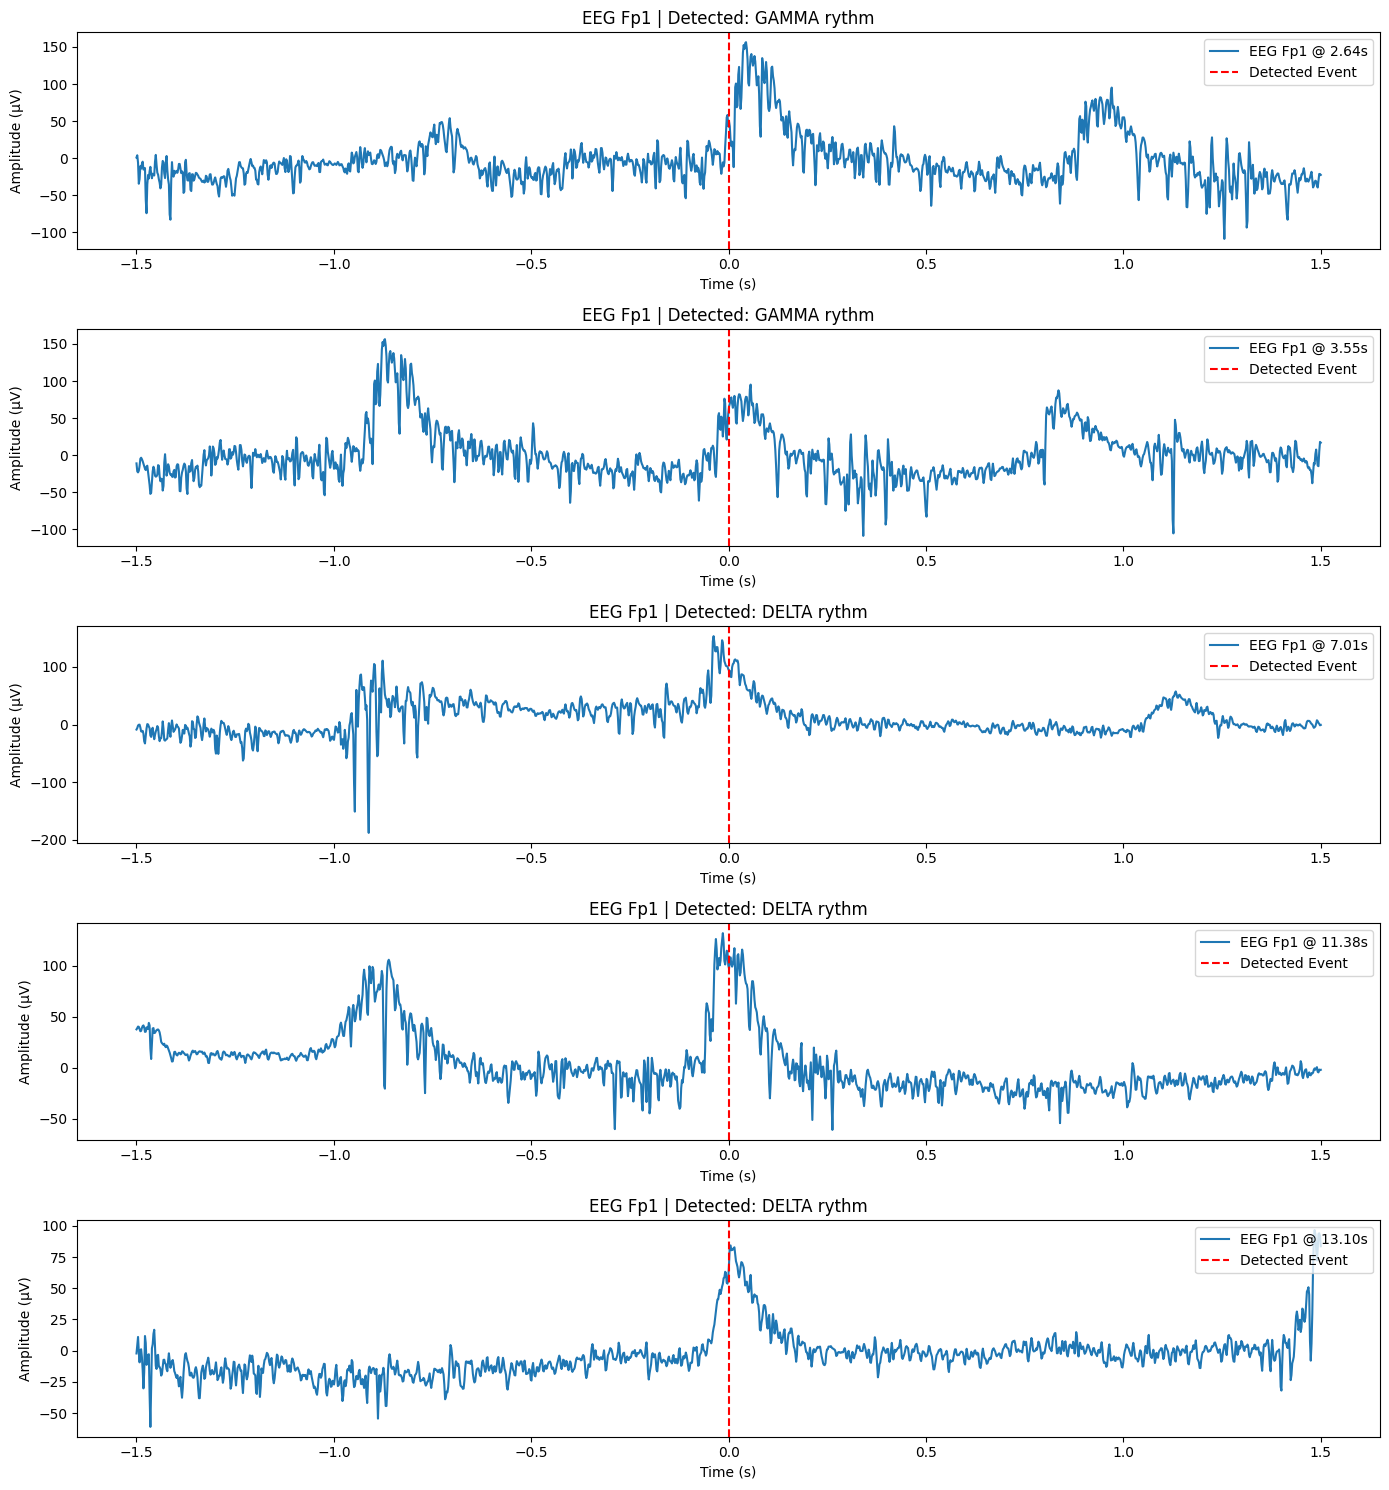

In [50]:
# Detect graphoelements in the data
detected_bands = et.detect_graphoelements(data, sfreq, bands={
    "delta" : [0, 4],
    "theta": [4, 8],
    "alpha": [8, 13],
    "beta": [13, 30],
    "gamma": [30, 100]
    })

et.plot_graph_segments(data, sfreq, detected_bands, ch_names)